In [9]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset from scikit-learn
iris_sklearn = load_iris()

# Create a Pandas DataFrame from the dataset
iris = pd.DataFrame(data=iris_sklearn.data, columns=iris_sklearn.feature_names)
iris['species'] = iris_sklearn.target

# Display the first few rows of the dataset
iris.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Rows**: n_samples <br>
**Columns**: n_features <br>
Column 갯수: 축갯수 (차원 갯수) <br>

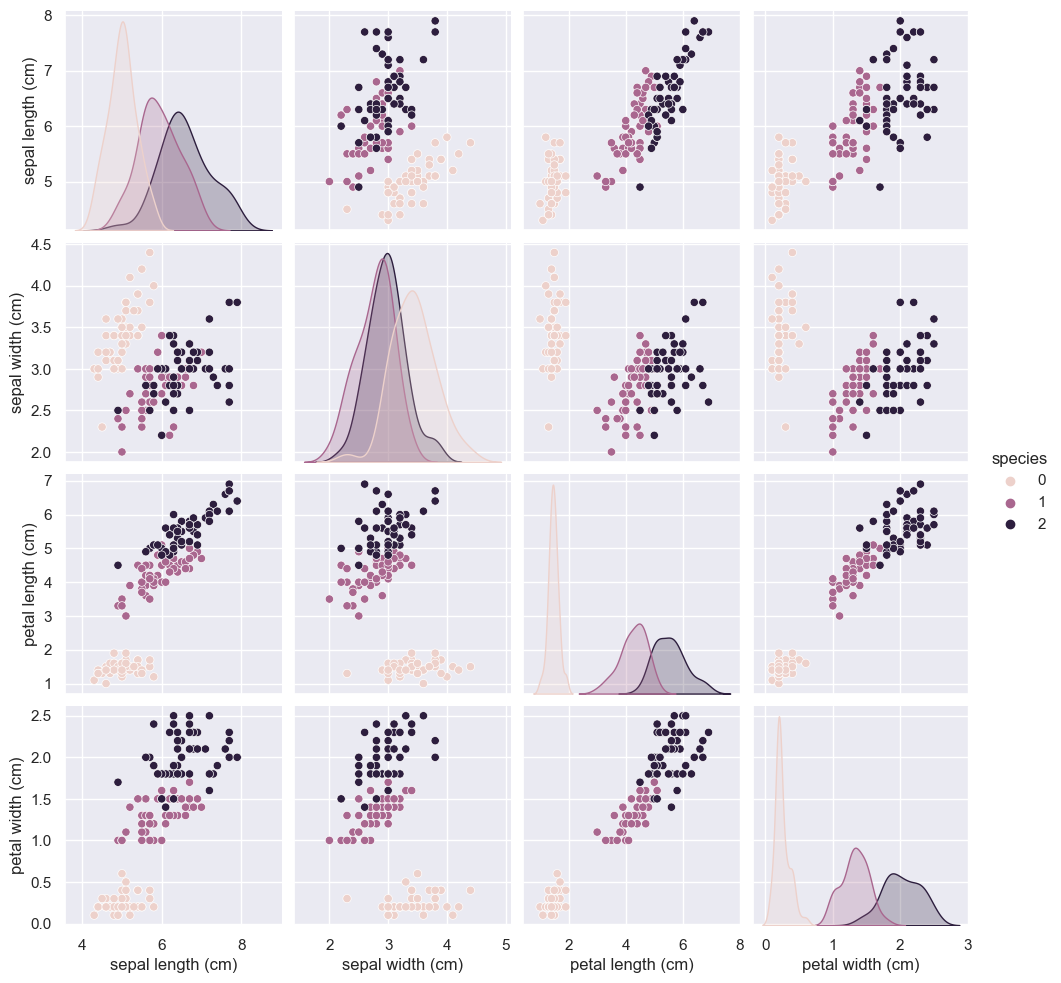

In [8]:
%matplotlib inline
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
sns.pairplot(iris, hue='species', height=2.5)

# Display the plot
plt.show()

In [10]:
iris.shape

(150, 5)

In [14]:
X_iris = iris.drop('species',axis=1) # 열 삭제
y_iris  = iris['species']
print(X_iris.shape)
print(y_iris.shape)

(150, 4)
(150,)


## Scikit-Learn's Estimator API
### Basics of the API

1. Choose Model Class
```python
from sklearn.linear_model import LinearRegression
```
2. Choose model hyperparameters by instantiating this class with desired values.
```python
model = LinearRegression(fit_intercept=True)
```
3. Arrange data into a features matrix and target vector following the discussion above.
```python
X = x[:, np.newaxis] #(50,)->(50,1)
```
4. Fit the model to your data by calling the ``fit()`` method of the model instance.
```python
model.fit(X,y)   # 객체.학습 메소드(n_samples,one feature) => a,b 찾음
model.coef_      # a, 즉 기울기
model.intercept_ # b, 즉 절편
```
5. Apply the Model to new data:
```python
xfit = np.linspace(-1,11)
Xfit = xfit[:,np.newaxis] # x값을 [n_samples,n_features]에 맞춰야함
```
   - For supervised learning, often we predict labels for unknown data using the ``predict()`` method.
   ```python
   yfit = model.predict(Xfit)
   ```
   - For unsupervised learning, we often transform or infer properties of the data using the ``transform()`` or ``predict()`` method.
6. Make graph:
```python
plt.scatter(x,y)
plt.plot(xfit,yfit);
```

### Supervised learning example: Simple linear regression

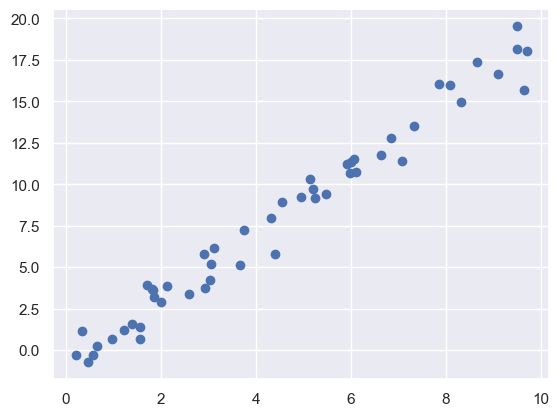

In [19]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [20]:
from sklearn.linear_model import LinearRegression as sklr

In [21]:
model = LinearRegression(fit_intercept=True)
X = x[:, np.newaxis]

In [24]:
model.fit(X,y)   # 객체.학습 메소드(n_samples,one feature) => a,b 찾음
print(model.coef_)      # a, 즉 기울기
print(model.intercept_) # b, 즉 절편

[1.9776566]
-0.903310725531111


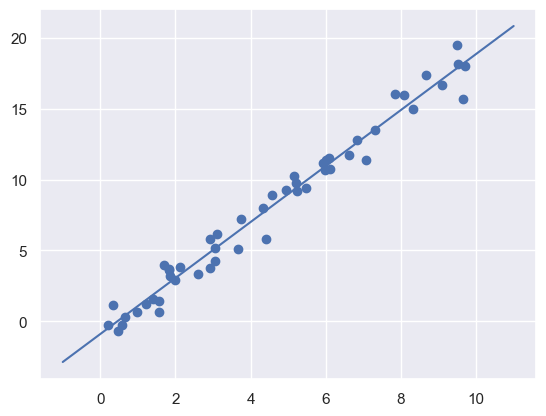

In [25]:
xfit = np.linspace(-1,11)
Xfit = xfit[:,np.newaxis] 
yfit = model.predict(Xfit)
plt.scatter(x,y)
plt.plot(xfit,yfit);

### Supervised learning example: Iris classification

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the Iris dataset from scikit-learn
iris_sklearn = load_iris()
X_iris = iris_sklearn.data
y_iris = iris_sklearn.target

# Split the dataset into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)


In [34]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [35]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(X_train, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

### Unsupervised learning example: Iris dimensionality

As an example of an unsupervised learning problem, let's take a look at reducing the dimensionality of the Iris data so as to more easily visualize it.
Recall that the Iris data is four dimensional: there are four features recorded for each sample.

The task of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that retains the essential features of the data.
Often dimensionality reduction is used as an aid to visualizing data: after all, it is much easier to plot data in two dimensions than in four dimensions or higher!

Here we will use principal component analysis (PCA; see [In Depth: Principal Component Analysis](05.09-Principal-Component-Analysis.ipynb)), which is a fast linear dimensionality reduction technique.

In [46]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

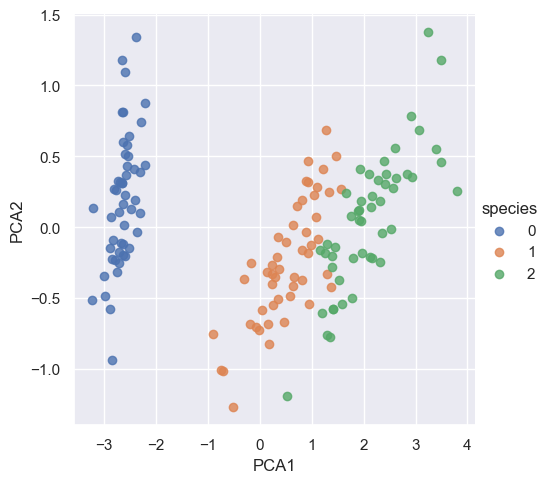

In [47]:
import seaborn as sns
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
# Create a scatter plot using seaborn
sns.lmplot(x="PCA1", y="PCA2", hue='species', data=iris, fit_reg=False)

# 4차원(4열)에서 2차원으로 축소

### Iris Clustering

In [49]:
from sklearn.mixture import GaussianMixture as GMM      # 1. Choose the model class
model = GMM(n_components=3,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)        # 4. Determine cluster labels

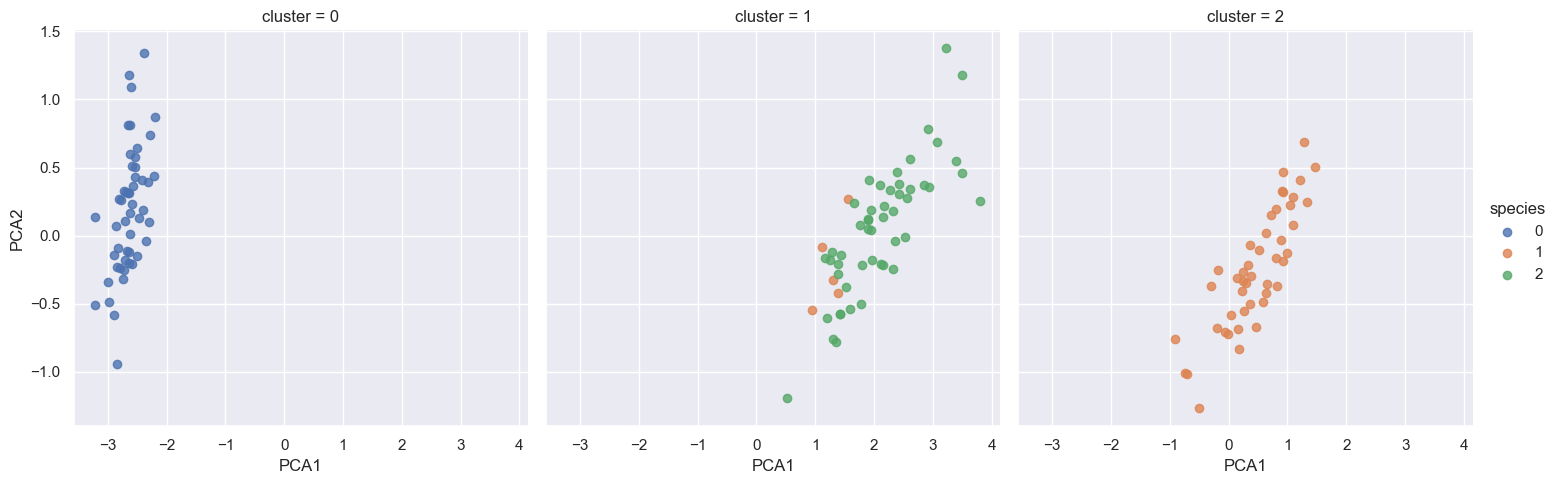

In [51]:
iris['cluster'] = y_gmm
sns.lmplot(x="PCA1", y="PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

## Application: Exploring Hand-written Digits
### Loading and visualizing the digits data

In [52]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape
#three-dimensional array: 1,797 samples each consisting of an 8 × 8 grid of pixels. 

(1797, 8, 8)

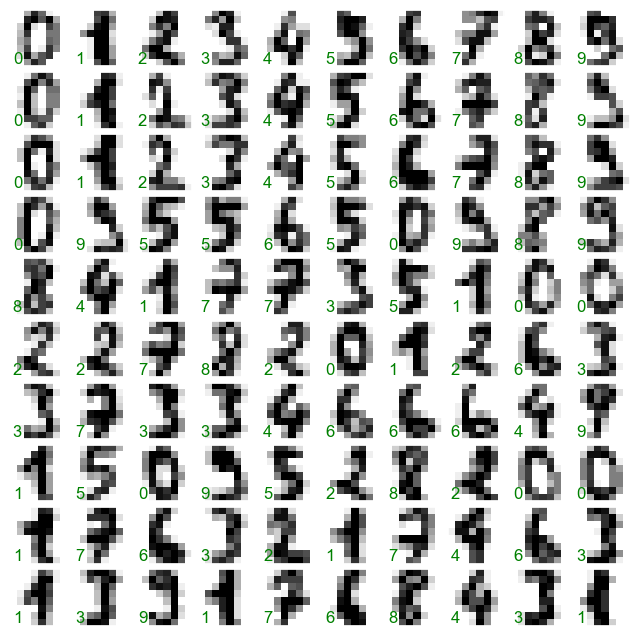

In [53]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

# Visualization of first hundred

### Unsupervised learning: Dimensionality reduction
**isomap** 다양체(manifold) 학습( 다차원->저차원)

In [59]:
from sklearn.manifold import Isomap

# Instantiate the Isomap model with a higher number of neighbors
iso = Isomap(n_components=2, n_neighbors=10)  # You can adjust the value of n_neighbors

# Fit the model to the data
iso.fit(digits.data)

# Transform the data
data_projected = iso.transform(digits.data)

# Display the shape of the transformed data
print(data_projected.shape)

(1797, 2)


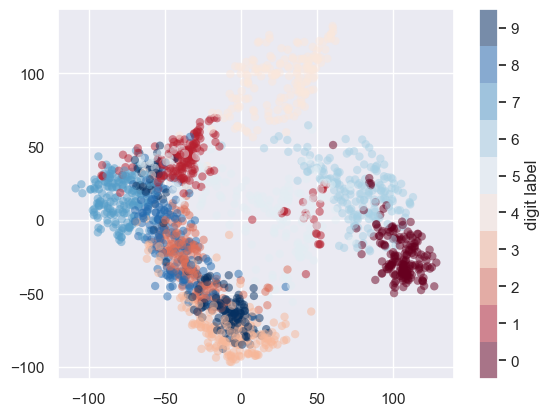

In [61]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('RdBu', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

### Classification on digits


Let's apply a classification algorithm to the digits.
As with the Iris data previously, we will split the data into a training and testing set, and fit a Gaussian naive Bayes model:

In [63]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [64]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

ValueError: Unknown label type: (array([-0.7161115 , -0.29896653,  0.26520582,  0.65443493,  1.16566447,
        1.22109281,  1.4000462 ,  1.60421824,  3.21035654,  3.36710603,
        3.59937032,  3.66749887,  3.8584585 ,  4.24562734,  5.13103024,
        5.17932245,  5.80012793,  5.81548096,  6.14962364,  7.22926896,
        7.9701638 ,  8.93392551,  9.18591626,  9.40444538,  9.73011153,
       10.67206599, 10.75788366, 11.36591852, 11.3984114 , 11.51229264,
       11.74868864, 14.97193082, 15.69289556, 16.05975926, 16.66813782,
       17.38064514, 18.18565441]),)

This shows us where the mis-labeled points tend to be: for example, a large number of twos here are mis-classified as either ones or eights.

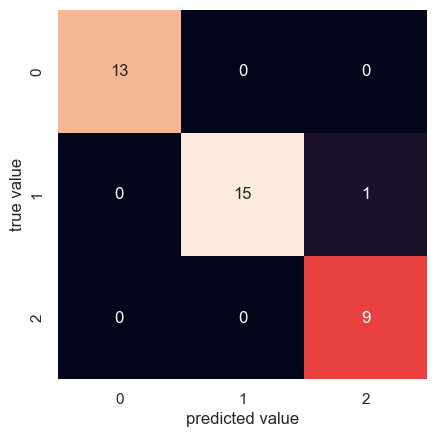

In [62]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

ValueError: cannot reshape array of size 13 into shape (8,8)

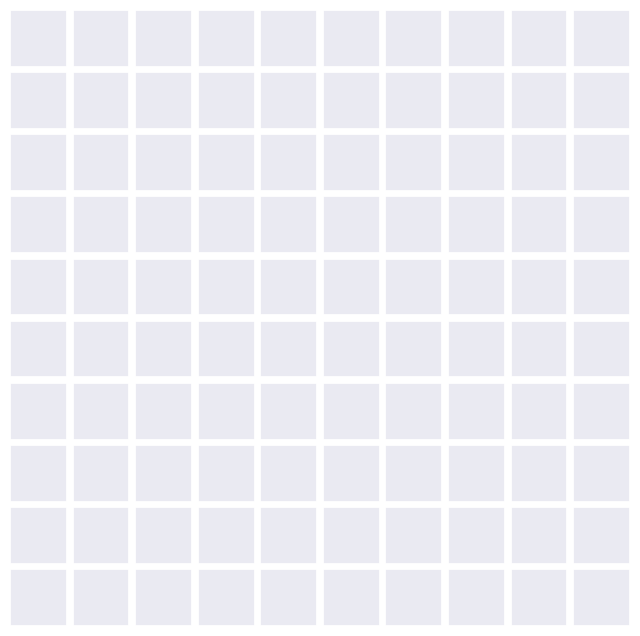

In [65]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')